In [2]:
import pandas as pd

In [3]:
product_data = pd.read_csv('../data/product_data.csv').dropna()


In order to do forecasting, it will be much easier to have the dataset stored as time: demand_product_1, demand_product_2, etc. Let's do that:

In [4]:
import datetime
import time
import re
date_regex = re.compile('(.*)\/(.*)\/(.*)')
dates = {}
categories = {}
unique_products = set()
shipping_locations = set()
for row in product_data.itertuples():
    matched = date_regex.match(str(row.Date))
    year = int(matched.group(1))
    month = int(matched.group(2))
    day = int(matched.group(3))
    unix_timestamp = int(datetime.datetime(year, month, day).replace(tzinfo=datetime.timezone.utc).timestamp())
    
    if unix_timestamp not in dates:
        dates[unix_timestamp] = {}
    dates[unix_timestamp][row.Product_Code] = int(row.Order_Demand.replace('(', '').replace(')',''))
    unique_products.add(row.Product_Code)
    if row.Product_Category not in categories:
        categories[row.Product_Category] = set()
    categories[row.Product_Category].add(row.Product_Code)
    shipping_locations.add(row.Warehouse)

In [5]:
columns_list = ['date']
for x in unique_products:
    columns_list.append(x)

sorted_keys = list(dates.keys())
sorted_keys.sort()
sales_by_day = pd.DataFrame(columns=columns_list, index=sorted_keys)

counter = 0
for x in sorted_keys:
    new_dict = {}
    for y in dates[x].keys():
        new_dict[y] = dates[x][y]
    new_dict['date'] = x
    
    row_to_add = pd.Series(new_dict)
    sales_by_day.loc[x] = row_to_add




First let's see how many entries occur for each year. This might give us a better idea of how the data is distributed.


In [6]:
sales_by_day = sales_by_day.fillna(0)
sales_by_day

,date,Product_0433,Product_1301,Product_0140,Product_1076,Product_1624,Product_1183,Product_0731,Product_2012,Product_1336,...,Product_1388,Product_1961,Product_1119,Product_0672,Product_0874,Product_0113,Product_1315,Product_1237,Product_1673,Product_0121
1294444800,1.294445e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1306800000,1.306800e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1308873600,1.308874e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1314921600,1.314922e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1317081600,1.317082e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1317340800,1.317341e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1319068800,1.319069e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1320019200,1.320019e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1320364800,1.320365e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1321574400,1.321574e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


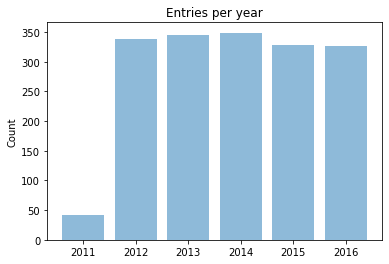

In [7]:
import matplotlib.pyplot as plt
import numpy as np

count_2011 = 0
count_2012 = 0
count_2013 = 0
count_2014 = 0
count_2015 = 0
count_2016 = 0
for row in sales_by_day.itertuples(index=False):
    if row[0] < 1325376000: #2011
        count_2011 += 1
    elif row[0] < 1356998400: #2012
        count_2012 += 1
    elif row[0] < 1388534400: #2013
        count_2013 += 1
    elif row[0] < 1420070400: #2014
        count_2014 += 1
    elif row[0] < 1451606400: #2015
        count_2015 += 1
    else: #2016
        count_2016 += 1
    
objects = ('2011', '2012', '2013', '2014', '2015', '2016')
counts = [count_2011, count_2012, count_2013, count_2014, count_2015, count_2016]
plt.bar(np.arange(len(objects)), counts, align='center', alpha=0.5)
plt.xticks(np.arange(len(objects)), objects)
plt.ylabel('Count')
plt.title('Entries per year')
plt.show()



As you can see, not many entries are made in the year 2011, so we'll just focus on the rest of the years instead.

In [8]:
sales_by_day = sales_by_day[(sales_by_day.date >= 1325376000)]


One useful feature might be the total amount of sales done on a given day across all products, let's calculate that:

In [9]:
def get_total_sales(row):
    return sum(row[1:-1])
    

sales_by_day['total_sales'] = sales_by_day.apply(lambda row: get_total_sales(row), axis=1)

In [10]:
sales_by_day

,date,Product_0433,Product_1301,Product_0140,Product_1076,Product_1624,Product_1183,Product_0731,Product_2012,Product_1336,...,Product_1961,Product_1119,Product_0672,Product_0874,Product_0113,Product_1315,Product_1237,Product_1673,Product_0121,total_sales
1325376000,1.325376e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1325462400,1.325462e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,348122.0
1325548800,1.325549e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1220927.0
1325635200,1.325635e+09,0.0,0.0,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161630.0
1325721600,1.325722e+09,0.0,0.0,168.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,5.0,0.0,1000.0,200.0,0.0,0.0,0.0,3060819.0
1325808000,1.325808e+09,0.0,200.0,312.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,100.0,0.0,1.0,0.0,1515224.0
1325980800,1.325981e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13000.0,0.0,0.0,986350.0
1326067200,1.326067e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,38000.0,0.0,0.0,691476.0
1326153600,1.326154e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,300.0,0.0,0.0,0.0,1035805.0
1326240000,1.326240e+09,0.0,0.0,96.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,1036183.0


Let's see if there are any noticeable trends in total sales over time:


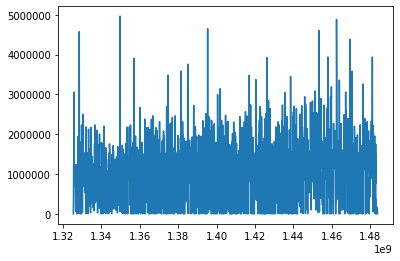

In [11]:
sales_by_day['total_sales'].plot()

I don't see any real pattern, but it still could be helpful. We could also try computing the 7-day (weekly) moving average of total sales and use that as a feature.

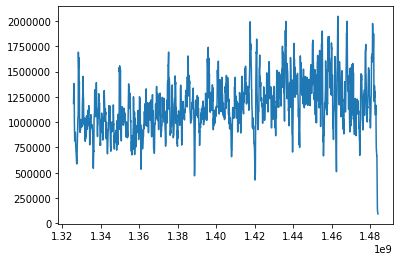

In [12]:


sales_by_day['weekly_total_sales_ma'] = sales_by_day['total_sales'].rolling(7).mean()
sales_by_day['weekly_total_sales_ma'].plot()

It seems there is a slight upward trend! (the downturn at the end is due to the smaller window size).

As is tradition, I'm also curious as to how overall demand might correlate with general economic performance, so let's grab the daily S&P 500 data from 2012-2016. 

In [13]:
sp500_data = pd.read_csv('../data/sp500.csv').dropna()
sales_by_day['sp500close'] = 0.0
date_regex = re.compile('(.*)\-(.*)\-(.*)')
for row in sp500_data.itertuples():
    matched = date_regex.match(row.Date)
    year = int(matched.group(1))
    month = int(matched.group(2))
    day = int(matched.group(3))
    unix_timestamp = int(datetime.datetime(year, month, day).replace(tzinfo=datetime.timezone.utc).timestamp())
    sales_by_day.loc[unix_timestamp].sp500close = row.Close

On holidays and weekends, the market is closed, so we'll fill in those cells with whatever the most previous closing price was

In [14]:
sales_by_day['sp500close'] = sales_by_day['sp500close'].replace(to_replace=0, method='ffill')
sales_by_day['sp500close'] = sales_by_day['sp500close'].replace(to_replace=0, method='bfill')



Ok cool, so we have some features, let's see how accurate our forcasting is:

Let's try linear regression as a baseline, we'll try to predict future values for Product_0222, using the 7 day moving average and sp500 value as features:

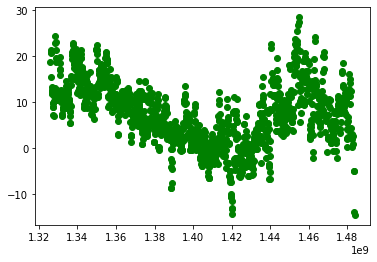

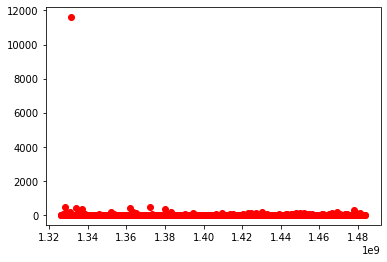

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sales_by_day = sales_by_day.dropna()
X = sales_by_day[['date', 'sp500close', 'weekly_total_sales_ma']]
y = sales_by_day['Product_0222']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.8, random_state=42069, shuffle=True)

model = LinearRegression()
model.fit(train_x, train_y)

predictions = model.predict(test_x)

plt.scatter(test_x['date'], predictions, color='green')
plt.show()
plt.scatter(test_x['date'], test_y, color='red')
plt.show()

It looks like there's an outlier, let's make it smaller it so we can compare the predictions better:


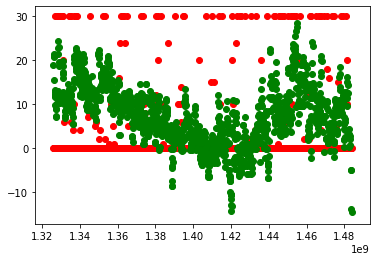

In [16]:
test_y = np.clip(test_y, -100.0, 30)
plt.scatter(test_x['date'], test_y, color='red')
plt.scatter(test_x['date'], predictions, color='green')
plt.show()


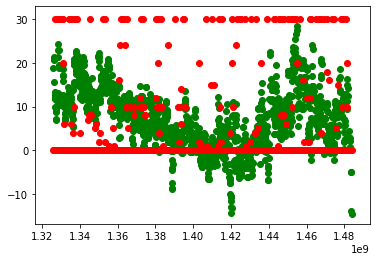

In [17]:
plt.scatter(test_x['date'], predictions, color='green')
plt.scatter(test_x['date'], test_y, color='red')
plt.show()

These graphs are not very helpful, and neither are our predictions it seems. I think the timeframe is too small. Let's try to compute the moving average for each product and try to predict future movements for that instead. To do that we'll need to compute the moving average for each product (we'll use the 30 day moving average). Let's do that:

In [18]:
for x in unique_products:
    sales_by_day[x + '_ma'] = sales_by_day[x].rolling(30).mean()


In [19]:
sales_by_day = sales_by_day.dropna()

In [20]:
sales_by_day

,date,Product_0433,Product_1301,Product_0140,Product_1076,Product_1624,Product_1183,Product_0731,Product_2012,Product_1336,...,Product_1388_ma,Product_1961_ma,Product_1119_ma,Product_0672_ma,Product_0874_ma,Product_0113_ma,Product_1315_ma,Product_1237_ma,Product_1673_ma,Product_0121_ma
1328659200,1.328659e+09,0.0,100.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,810.000000,0.000000,0.600000,2.966667,0.000000,100.000000,1500.000000,3400.000000,0.600000,15.000000
1328745600,1.328746e+09,500.0,0.0,1.0,500.0,0.0,0.0,0.0,0.0,0.0,...,683.333333,0.000000,0.600000,3.000000,0.000000,100.000000,1500.000000,2966.666667,0.633333,15.000000
1328832000,1.328832e+09,2500.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,...,683.333333,0.000000,0.600000,3.033333,0.000000,100.000000,1510.000000,1700.000000,0.633333,15.000000
1328918400,1.328918e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,666.666667,0.000000,0.600000,3.033333,0.000000,100.000000,1500.000000,1700.000000,0.633333,15.000000
1329004800,1.329005e+09,0.0,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0,...,666.666667,0.000000,0.566667,3.033333,0.000000,100.000000,1466.666667,5733.333333,0.633333,15.000000
1329091200,1.329091e+09,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,560.000000,0.000000,0.600000,3.066667,0.000000,100.000000,1496.666667,6633.333333,0.666667,15.000000
1329177600,1.329178e+09,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,566.666667,0.066667,0.600000,2.966667,0.000000,100.000000,830.000000,6666.666667,0.666667,15.000000
1329264000,1.329264e+09,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,566.666667,0.066667,0.600000,3.966667,0.000000,100.000000,833.333333,6666.666667,0.666667,21.666667
1329350400,1.329350e+09,500.0,0.0,8.0,0.0,0.0,0.0,5.0,0.0,0.0,...,300.000000,0.066667,0.600000,4.000000,0.000000,100.000000,836.666667,6666.666667,0.666667,21.666667
1329436800,1.329437e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,356.666667,0.066667,0.600000,3.966667,0.000000,100.000000,1160.000000,6666.666667,0.600000,21.666667


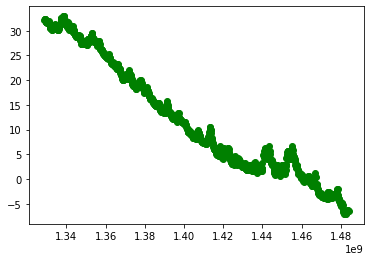

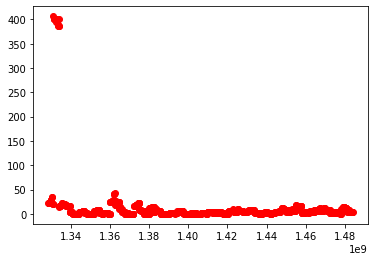

In [21]:

X = sales_by_day[['date', 'sp500close', 'weekly_total_sales_ma']]
y = sales_by_day['Product_0222_ma']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.8, random_state=42069, shuffle=True)

model = LinearRegression()
model.fit(train_x, train_y)

predictions = model.predict(test_x)

plt.scatter(test_x['date'], predictions, color='green')
plt.show()
plt.scatter(test_x['date'], test_y, color='red')
plt.show()

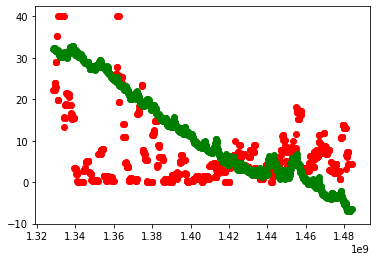

In [22]:
test_y = np.clip(test_y, 0, 40)
plt.scatter(test_x['date'], test_y, color='red')
plt.scatter(test_x['date'], predictions, color='green')
plt.show()

This also does not seem very effective (very clearly, no need to compute accuracy). I think the variance in the dataset is making my strategy very ineffective for prediction.